In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import re
import nltk

In [2]:
Spotify = pd.read_csv('MoodyLyrics-1865-Sentiment-Audio.csv', index_col=0, encoding="utf-8")
Spotify

,artist,title,lyrics sentiment,mood,lyrics,spotify_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
index,,,,,,,,,,,,,,,,,
ML1,George Michael,I Want Your Sex,pos,happy,In the past there were arguments for and again...,6QnFHieoch6U9J8zfv6hml,0.812,0.600,10,-13.418,0,0.0538,0.005090,0.024800,0.0465,0.800,99.189
ML2,Rob Zombie,Pussy Liquor,neg,angry,Baby :\nGimme a B\nGimme a A\nGimme a B\nGimme...,03VzAAMs5PrLM42XR7ijuc,0.540,0.923,10,-3.965,1,0.0324,0.000347,0.006140,0.4840,0.531,112.936
ML3,Katatonia,12,neg,sad,Black theatre of love\nViolet dancers cast the...,4GCOPgFknQSHVXuAAdQYjk,0.134,0.674,6,-8.428,1,0.0478,0.000460,0.703000,0.2040,0.162,69.289
ML4,Bing Crosby,Swinging On A Star,pos,happy,Would you like to swing on a star\nCarry moonb...,7xy0PAZxzGDOcYzyptvprd,0.706,0.167,0,-13.137,1,0.0602,0.896000,0.000000,0.1010,0.724,139.763
ML5,Ludacris,Get Back,neg,angry,"Heads up! (woop, woop) Heads up! (woop, woop)\...",6o3MvjWfF0jczTzPRcfZsK,0.562,0.638,1,-5.141,1,0.2750,0.055900,0.000000,0.1270,0.165,171.758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ML1996,A Day To Remember,If It Means a Lot to You,neg,sad,"And hey, darling\nI hope you're good tonight\n...",7q3JtqOJLKnVvnhUEpH6yo,0.584,0.536,10,-8.158,1,0.0279,0.112000,0.000000,0.4560,0.441,127.001
ML1997,Prince,"Beautiful, Loved and Blessed",pos,relaxed,"Wake up\nYou're beautiful, loved and blessed\n...",0XPuBeH9uAMmwNi0gxIe6r,0.844,0.659,1,-3.577,0,0.1300,0.251000,0.000045,0.0825,0.814,94.437
ML1998,Deine Lakaien,The Game,neg,sad,Grey eyes flicker\nCold is the weed\nWorn out ...,1ixHb0p0BEfLrq8qffdU5v,0.566,0.224,7,-16.267,0,0.0261,0.948000,0.128000,0.1100,0.300,82.002


In [7]:
spid = Spotify["spotify_id"].values
list(spid)
for i in range(5):
    print(spid[i])

6QnFHieoch6U9J8zfv6hml
03VzAAMs5PrLM42XR7ijuc
4GCOPgFknQSHVXuAAdQYjk
7xy0PAZxzGDOcYzyptvprd
6o3MvjWfF0jczTzPRcfZsK


In [11]:
test_ids = spid[:3]
test = Spotify[~Spotify.spotify_id.isin(test_ids)]
test

,artist,title,lyrics sentiment,mood,lyrics,spotify_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
index,,,,,,,,,,,,,,,,,
ML4,Bing Crosby,Swinging On A Star,pos,happy,Would you like to swing on a star\nCarry moonb...,7xy0PAZxzGDOcYzyptvprd,0.706,0.167,0,-13.137,1,0.0602,0.896000,0.000000,0.1010,0.724,139.763
ML5,Ludacris,Get Back,neg,angry,"Heads up! (woop, woop) Heads up! (woop, woop)\...",6o3MvjWfF0jczTzPRcfZsK,0.562,0.638,1,-5.141,1,0.2750,0.055900,0.000000,0.1270,0.165,171.758
ML6,Hole,Violet,neg,angry,And the sky was made of amethyst\nAnd all the ...,1H63ixBDLtgp6e089dgyuz,0.461,0.641,7,-10.912,1,0.0416,0.066400,0.000022,0.1620,0.372,111.429
ML7,Manic Street Preachers,Ifwhiteamericatoldthetruthforonedayit'sworldwo...,neg,angry,Next Thursday you're invited to watch Rising T...,5Dcpl2k7kJzgZecHHeZiAu,0.348,0.808,4,-4.562,0,0.0847,0.000326,0.000000,0.2010,0.469,147.998
ML8,Emerson Hart,If You're Gonna Leave,pos,sad,Maybe I'm the joker\nMaybe I'm the fool in you...,7spcc0WMgkXCjdc8t1ugB2,0.448,0.519,1,-5.607,1,0.0301,0.025100,0.000000,0.0990,0.355,154.220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ML1996,A Day To Remember,If It Means a Lot to You,neg,sad,"And hey, darling\nI hope you're good tonight\n...",7q3JtqOJLKnVvnhUEpH6yo,0.584,0.536,10,-8.158,1,0.0279,0.112000,0.000000,0.4560,0.441,127.001
ML1997,Prince,"Beautiful, Loved and Blessed",pos,relaxed,"Wake up\nYou're beautiful, loved and blessed\n...",0XPuBeH9uAMmwNi0gxIe6r,0.844,0.659,1,-3.577,0,0.1300,0.251000,0.000045,0.0825,0.814,94.437
ML1998,Deine Lakaien,The Game,neg,sad,Grey eyes flicker\nCold is the weed\nWorn out ...,1ixHb0p0BEfLrq8qffdU5v,0.566,0.224,7,-16.267,0,0.0261,0.948000,0.128000,0.1100,0.300,82.002


### Categorical Features

In [50]:
categorical = ['lyrics sentiment', 'mood', 'mode', 'key']

with open('MoodyLyrics-1865-CAT.csv', 'w', newline='', encoding='utf-8') as file:
    headings = ['FEATURENAME', 'Count', '% Miss.', 'Card.', 'Mode', 'Mode Freq.', 'Mode %', '2nd Mode', '2nd Mode Freq.', '2nd Mode %']
    datawriter = csv.writer(file)
    
    datawriter.writerow(headings)
    
    for feature in categorical:
        print(feature)
        
        # Get count
        count = Spotify[feature].size
        print("count:",count)
        
        # Get missing percentage
        missing = round((Spotify[feature].isna().sum() / len(Spotify[feature])) * 100,1)
        print("missing:",missing)
        
        # Get cardinality
        cardinality = Spotify[feature].nunique()
        print("card:",cardinality)
        
        # Get mode
        mode = Spotify[feature].value_counts().index[0]
        print("mode:",mode)
        
        # Get mode frequency
        mode_freq = Spotify[feature].value_counts()[mode]
        print("mode-freq:",mode_freq)
        
        # Get mode percentage
        mode_percent = round((Spotify[feature].value_counts()[mode] / len(Spotify[feature])) * 100,1)
        print("mode-percent:",mode_percent)
        
        # Get 2nd mode
        second_mode = Spotify[feature].value_counts().index[1]
        print("2nd-mode:",second_mode)
        
        # Get 2nd mode frequency
        second_mode_freq = Spotify[feature].value_counts()[second_mode]
        print("2nd-mode-freq:",second_mode_freq)
        
        # Get 2nd mode percentage
        second_mode_percent = round((Spotify[feature].value_counts()[second_mode] / len(Spotify[feature])) * 100,1)
        print("2nd-mode-percent:",second_mode_percent,"\n")
        
        datawriter.writerow([feature, count, missing, cardinality, mode, mode_freq, mode_percent, second_mode, second_mode_freq, second_mode_percent])


lyrics sentiment
count: 1865
missing: 0.0
card: 2
mode: neg
mode-freq: 1047
mode-percent: 56.1
2nd-mode: pos
2nd-mode-freq: 818
2nd-mode-percent: 43.9 

mood
count: 1865
missing: 0.0
card: 4
mode: angry
mode-freq: 486
mode-percent: 26.1
2nd-mode: happy
2nd-mode-freq: 462
2nd-mode-percent: 24.8 

mode
count: 1865
missing: 0.0
card: 2
mode: 1
mode-freq: 1265
mode-percent: 67.8
2nd-mode: 0
2nd-mode-freq: 600
2nd-mode-percent: 32.2 

key
count: 1865
missing: 0.0
card: 12
mode: 7
mode-freq: 244
mode-percent: 13.1
2nd-mode: 0
2nd-mode-freq: 239
2nd-mode-percent: 12.8 



In [51]:
categorical_features = pd.read_csv('MoodyLyrics-1865-CAT.csv', index_col=0, encoding="utf-8")
categorical_features

,Count,% Miss.,Card.,Mode,Mode Freq.,Mode %,2nd Mode,2nd Mode Freq.,2nd Mode %
FEATURENAME,,,,,,,,,
lyrics sentiment,1865,0.0,2,neg,1047,56.1,pos,818,43.9
mood,1865,0.0,4,angry,486,26.1,happy,462,24.8
mode,1865,0.0,2,1,1265,67.8,0,600,32.2
key,1865,0.0,12,7,244,13.1,0,239,12.8


<AxesSubplot:>

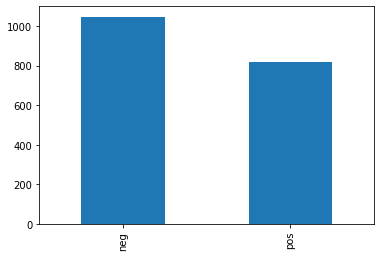

In [61]:
Spotify['lyrics sentiment'].value_counts().plot(kind='bar')

In [3]:
Spotify['lyrics sentiment'].value_counts()

neg    1047
pos     818
Name: lyrics sentiment, dtype: int64

<AxesSubplot:>

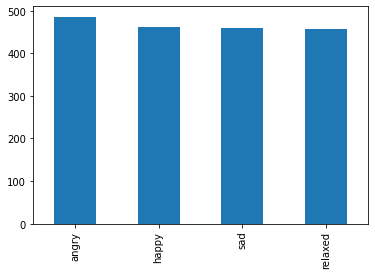

In [62]:
Spotify['mood'].value_counts().plot(kind='bar')

In [3]:
Spotify['mood'].value_counts()

angry      486
happy      462
sad        460
relaxed    457
Name: mood, dtype: int64

<AxesSubplot:>

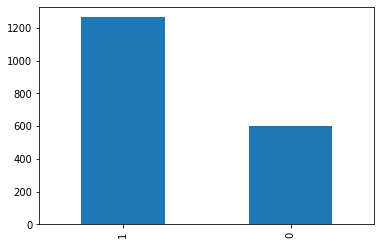

In [63]:
Spotify['mode'].value_counts().plot(kind='bar')

<AxesSubplot:>

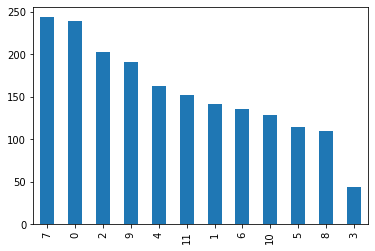

In [64]:
Spotify['key'].value_counts().plot(kind='bar')

### Continuous Features

In [54]:
continuous = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

import csv
with open('MoodyLyrics-1865-CONT.csv', 'w', newline='') as file:
    datawriter = csv.writer(file)
    
    headings = ['FEATURENAME', 'Count', '% Miss.', 'Card.', 'Min.', '1st Qrt.', 'Mean', 'Median', '3rd Qrt.', 'Max.', 'Std. Dev.']
    datawriter.writerow(headings) # Write headings first
    
    for feature in continuous:
        print(feature)
        
        # Get count
        count = Spotify[feature].size
        print("count:",count)
        
        # Get missing percentage
        missing = round((Spotify[feature].isna().sum() / len(Spotify[feature])) * 100, 1)
        print("missing:",missing)
        
        # Get cardinality
        cardinality = Spotify[feature].nunique()
        print("card:",cardinality)
        
        # Get minimum
        minimum = Spotify[feature].min()
        print("min:",minimum)
        
        # Get 1st Quarter Percentile
        firstQ = round(Spotify[feature].quantile(0.25),1)
        print("first Q:",firstQ)
        
        # Get mean
        mean = round(Spotify[feature].mean(),1)
        print("mean:",mean)
        
        # Get median
        median = Spotify[feature].median()
        print("median:",median)
        
        # Get 3rd Quarter Percentile
        thirdQ = round(Spotify[feature].quantile(0.75),1)
        print("third Q:",thirdQ)
        
        # Get maximum
        maximum = Spotify[feature].max()
        print("max:",maximum)
        
        # Get Standard deviation
        stdev = round(Spotify[feature].std(),1)
        print("stdev:",stdev,"\n")
        
        # Write the data
        datawriter.writerow([feature, count, missing, cardinality, minimum, firstQ, mean, median, thirdQ, maximum, stdev])

danceability
count: 1865
missing: 0.0
card: 662
min: 0.0778
first Q: 0.4
mean: 0.5
median: 0.507
third Q: 0.6
max: 0.962
stdev: 0.2 

energy
count: 1865
missing: 0.0
card: 778
min: 0.00402
first Q: 0.5
mean: 0.7
median: 0.7
third Q: 0.9
max: 0.999
stdev: 0.3 

loudness
count: 1865
missing: 0.0
card: 1729
min: -34.316
first Q: -10.8
mean: -8.4
median: -7.536
third Q: -5.3
max: -0.938
stdev: 4.2 

speechiness
count: 1865
missing: 0.0
card: 723
min: 0.0234
first Q: 0.0
mean: 0.1
median: 0.0445
third Q: 0.1
max: 0.931
stdev: 0.1 

acousticness
count: 1865
missing: 0.0
card: 1349
min: 1.2e-06
first Q: 0.0
mean: 0.3
median: 0.0829
third Q: 0.5
max: 0.993
stdev: 0.3 

instrumentalness
count: 1865
missing: 0.0
card: 1235
min: 0.0
first Q: 0.0
mean: 0.1
median: 0.000714
third Q: 0.1
max: 0.986
stdev: 0.2 

liveness
count: 1865
missing: 0.0
card: 758
min: 0.0172
first Q: 0.1
mean: 0.2
median: 0.128
third Q: 0.3
max: 0.997
stdev: 0.2 

valence
count: 1865
missing: 0.0
card: 860
min: 0.0324
first 

In [55]:
continuous_features = pd.read_csv('MoodyLyrics-1865-CONT.csv', index_col=0, encoding="utf-8")
continuous_features

,Count,% Miss.,Card.,Min.,1st Qrt.,Mean,Median,3rd Qrt.,Max.,Std. Dev.
FEATURENAME,,,,,,,,,,
danceability,1865,0.0,662,0.077800,0.4,0.5,0.507000,0.6,0.962,0.2
energy,1865,0.0,778,0.004020,0.5,0.7,0.700000,0.9,0.999,0.3
loudness,1865,0.0,1729,-34.316000,-10.8,-8.4,-7.536000,-5.3,-0.938,4.2
speechiness,1865,0.0,723,0.023400,0.0,0.1,0.044500,0.1,0.931,0.1
acousticness,1865,0.0,1349,0.000001,0.0,0.3,0.082900,0.5,0.993,0.3
instrumentalness,1865,0.0,1235,0.000000,0.0,0.1,0.000714,0.1,0.986,0.2
liveness,1865,0.0,758,0.017200,0.1,0.2,0.128000,0.3,0.997,0.2
valence,1865,0.0,860,0.032400,0.2,0.5,0.430000,0.7,0.982,0.3
tempo,1865,0.0,1832,36.959000,99.7,122.0,119.852000,140.6,217.396,29.0


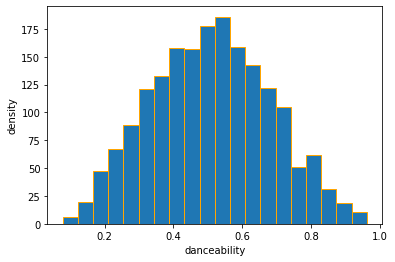

In [70]:
plt.ylabel('density')
plt.xlabel('danceability')

plt.hist(Spotify['danceability'], bins=20, edgecolor='orange')
plt.show()

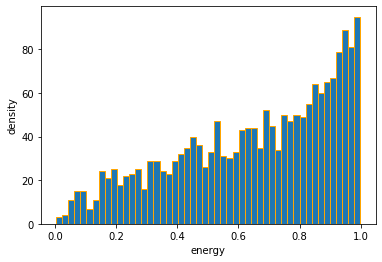

In [76]:
plt.ylabel('density')
plt.xlabel('energy')

plt.hist(Spotify['energy'], bins=50, edgecolor='orange')
plt.show()

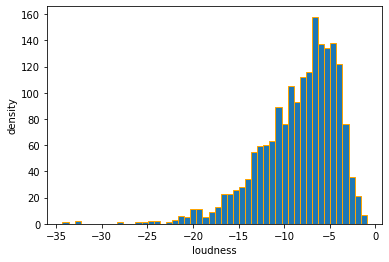

In [75]:
plt.ylabel('density')
plt.xlabel('loudness')

plt.hist(Spotify['loudness'], bins=50, edgecolor='orange')
plt.show()

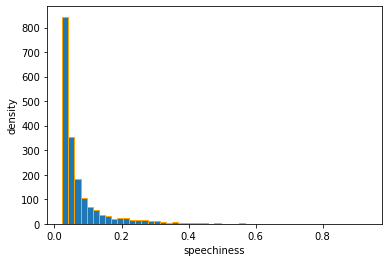

In [84]:
plt.ylabel('density')
plt.xlabel('speechiness')

plt.hist(Spotify['speechiness'], bins=50, edgecolor='orange')
plt.show()

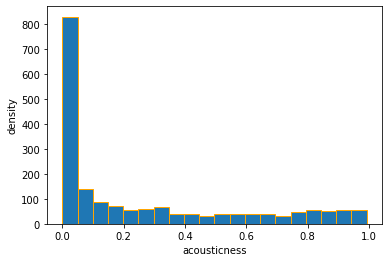

In [86]:
plt.ylabel('density')
plt.xlabel('acousticness')

plt.hist(Spotify['acousticness'], bins=20, edgecolor='orange')
plt.show()

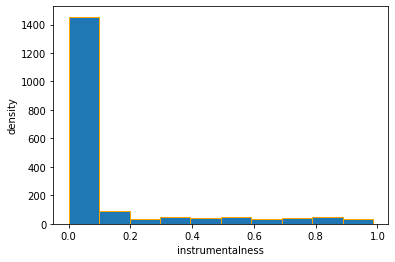

In [88]:
plt.ylabel('density')
plt.xlabel('instrumentalness')

plt.hist(Spotify['instrumentalness'], bins=10, edgecolor='orange')
plt.show()

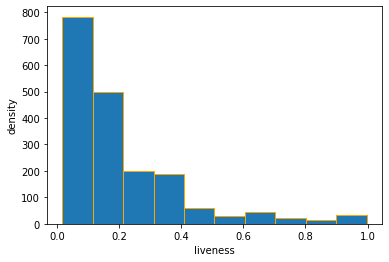

In [89]:
plt.ylabel('density')
plt.xlabel('liveness')

plt.hist(Spotify['liveness'], bins=10, edgecolor='orange')
plt.show()

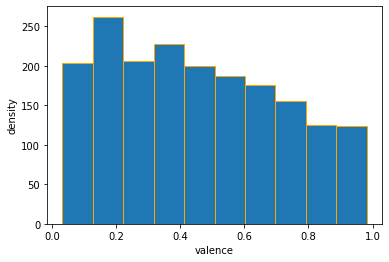

In [90]:
plt.ylabel('density')
plt.xlabel('valence')

plt.hist(Spotify['valence'], bins=10, edgecolor='orange')
plt.show()

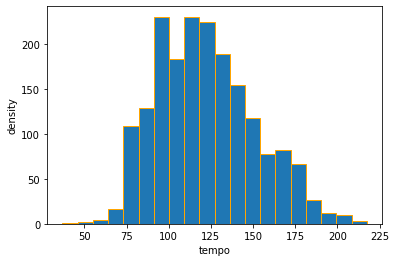

In [92]:
plt.ylabel('density')
plt.xlabel('tempo')

plt.hist(Spotify['tempo'], bins=20, edgecolor='orange')
plt.show()

### Get dictionary of phrases/words in brackets

In [17]:
in_brackets = []
def inside_brackets(lyrics):
    found = re.findall("[\(\[\{].*?[\)\]\}]", lyrics)
    if len(found) != 0 : 
        in_brackets.append(found)
    clean_lyrics = re.sub("[\(\[].*?[\)\]]", " ", lyrics)
    return clean_lyrics

Spotify['lyrics'] = Spotify['lyrics'].apply(inside_brackets)

print("Length of in brackets:",len(in_brackets),"\n")

for line in in_brackets:
    print(line)

Length of in brackets: 511 

['(sex! ow!)', '(let’s do it)', '(can we do it?)', '(sex)', '(sex)', '(sex)', '(sex)', '(sex)', '(sex)', '(sex)', '(hmm)', '(Sexy baby’s)', '(Sexy body)', '(Keeps me guessing)', '(Oh)', '(Sexy baby’s)', '(Sexy body)', '(Keeps me guessing)', '(Oh)']
['(woop, woop)', '(woop, woop)', '(another one)', '(woop, woop)', "(Get back motherfucker You don't know me like that)", '(woop, woop)', "(Get back motherfucker You don't know me like that)", '(yep!)', '(yep!)', '(woop, woop)', "(Get back motherfucker You don't know me like that)", '(woop, woop)', "(Get back motherfucker You don't know me like that)", '(I came)', '(I saw)', '(in the jaw)', '(I came)', '(I saw)', '(in the jaw)', '(I came)', '(I saw)', '(in the jaw)', '(I came)', '(I saw)', '(in the jaw)', '(woop, woop)', "(Get back motherfucker You don't know me like that)", '(woop, woop)', "(Get back motherfucker You don't know me like that)", '(woop, woop)', "(Get back motherfucker You don't know me like that)",

In [18]:
Spotify['lyrics']

index
ML1       In the past there were arguments for and again...
ML2       Baby :\nGimme a B\nGimme a A\nGimme a B\nGimme...
ML3       Black theatre of love\nViolet dancers cast the...
ML4       Would you like to swing on a star\nCarry moonb...
ML5       Heads up!   Heads up!  \nHere's another one!  ...
                                ...                        
ML1996    And hey, darling\nI hope you're good tonight\n...
ML1997    Wake up\nYou're beautiful, loved and blessed\n...
ML1998    Grey eyes flicker\nCold is the weed\nWorn out ...
ML1999    Yeah Yeah yeah yeah yeah\nWoah yeah talkin' 'b...
ML2000    All around the world\nHey girl, hey girl, hey ...
Name: lyrics, Length: 1865, dtype: object

### Regex testing

In [16]:
string = "Heads up! (woop, woop) Heads up! (woop, woop)\nHere's another one! (another one)\nAnd an-and another one\nO-o-oh!\n\nYeek yeek! (woop, woop) why you all in my ear?\nTalking a whole bunch of shit that I ain't trying to hear!\nGet back motherfucker, you don't know me like that!\n(Get back motherfucker You don't know me like that)\nYeek yeek! (woop, woop) I ain't playing around!\nMake one false move I'll take ya down\nGet back motherfucker, you don't know me like that!\n(Get back motherfucker You don't know me like that)\n\nWho-o-o!! S-s-so c'mon, c'mon!\nDon't get swung on, swung on!\nIt's the knick knack paddywhack, still ride in Cadillacs\nFamily off the street! made my homies put the baggies back\nStill stacking plaques! (yep!) still action packed! (yep!)\nAnd dough!! I keep it flipping like acrobats!\nThat's why I pack a mac, that'll crack 'em back\n'Cause on my waist there's more Heat than the Shaq Attack\nBut I ain't speaking about ballin, ballin\nJust thinking about brawlin till y'all start bawlin\nWe all in together now, birds of a feather now\nJust bought a plane so we changing the weather now\nSo put your brakes on, caps put your capes on\nOr knock off your block, get dropped and have your face flown\nCause I'll prove it! scratch off the music!\nLike hey little stupid! don't make me lose it!!\n\nYeek yeek! (woop, woop) why you all in my ear?\nTalking a whole bunch of shit that I ain't trying to hear!\nGet back motherfucker, you don't know me like that!\n(Get back motherfucker You don't know me like that)\nYeek yeek! (woop, woop) I ain't playing around!\nMake one false move I'll take ya down\nGet back motherfucker, you don't know me like that!\n(Get back motherfucker You don't know me like that)\n\nI came (I came) I saw (I saw)\nI hit 'em right dead in the jaw (in the jaw)\nI came (I came) I saw (I saw)\nI hit 'em right dead in the jaw (in the jaw)\nI came (I came) I saw (I saw)\nI hit 'em right dead in the jaw (in the jaw)\nI came (I came) I saw (I saw)\nI hit 'em right dead in the jaw (in the jaw)\n\nSee I caught 'em wit a right hook, caught 'em wit a jab\nCaught 'em wit an uppercut, kicked 'em in his ass\nSent him on his way cause I ain't for that talk!\nNo trips to the county, I ain't for that walk!\nWe split like two pins at the end of a lane\nWe'll knock out your spotlight and put an end to your vain\nPut a DTP pendant at the end of yo chain\nThen put the booty of a Swisha at the end of a flame\n\nYeek yeek! (woop, woop) why you all in my ear?\nTalking a whole bunch of shit that I ain't trying to hear!\nGet back motherfucker, you don't know me like that!\n(Get back motherfucker You don't know me like that)\nYeek yeek! (woop, woop) I ain't playing around!\nMake one false move I'll take ya down\nGet back motherfucker, you don't know me like that!\n(Get back motherfucker You don't know me like that)\n\nHey! You want what wit me?!\nI'm a tell you one time, don't FUCK wit me!\nGet down! Cause I ain't got nothing to lose\nI'm having a bad day, don't make me take it out on you!\nYou want what wit me?!\nI'm a tell you one time, don't fuck wit me!\nGet down! Cause I ain't got nothing to lose\nAnd I'm having a bad day, don't make me take it out on you!\n\nMan! Cause I don't wanna do that\nI want to have a good time and enjoy my Jack\nSit back and watch the women get drunk as hell\nSo I can wake up in the morning wit a story to tell\nI know it's been a lil while since I been out the house!\nBut now I'm here, you wanna stand around running your mouth?!\nI can't hear nothing you saying or spitting, so wassup!\nCan't you see we in the club?! Man shut the fuck up!!\n\nYeek yeek! (woop, woop) why you all in my ear?\nTalking a whole bunch of shit that I ain't trying to hear!\nGet back motherfucker, you don't know me like that!\n(Get back motherfucker You don't know me like that)\nYeek yeek! (woop, woop) I ain't playing around!\nMake one false move I'll take ya down\nGet back motherfucker, you don't know me like that!\n(Get back motherfucker You don't know me like that)\n\nAh! We in the Red Light District!\nAh! We in the Red Light District!\nWh-o-oh! We in the Red Light District!\nAh! We in the Red Light District!\nWh-o-oh! We in the Red Light District!\nWh-o-oh! The Red Light District!\nWh-o-oh! The Red Light District!\nAh, we in The Red Light District"
clean = re.sub("[\(\[].*?[\)\]]", "", string)
print(clean)

Heads up!  Heads up! 
Here's another one! 
And an-and another one
O-o-oh!

Yeek yeek!  why you all in my ear?
Talking a whole bunch of shit that I ain't trying to hear!
Get back motherfucker, you don't know me like that!

Yeek yeek!  I ain't playing around!
Make one false move I'll take ya down
Get back motherfucker, you don't know me like that!


Who-o-o!! S-s-so c'mon, c'mon!
Don't get swung on, swung on!
It's the knick knack paddywhack, still ride in Cadillacs
Family off the street! made my homies put the baggies back
Still stacking plaques!  still action packed! 
And dough!! I keep it flipping like acrobats!
That's why I pack a mac, that'll crack 'em back
'Cause on my waist there's more Heat than the Shaq Attack
But I ain't speaking about ballin, ballin
Just thinking about brawlin till y'all start bawlin
We all in together now, birds of a feather now
Just bought a plane so we changing the weather now
So put your brakes on, caps put your capes on
Or knock off your block, get dropped

In [10]:
string_lst = ['woop', 'another one']
x = "Heads up! (woop, woop) Heads up! (woop, woop)\nHere's another one! (another one)"
print(re.findall(r"\b" + '|'.join(string_lst) + r"\b", x))

['woop', 'woop', 'woop', 'woop', 'another one', 'another one']


In [12]:
string_lst = ['repeat', 'verse', 'chorus', 'instrumental', 'solo']
x = "VERSE 1: Blah (repeat x2)"
print(re.findall(r"\b" + '|'.join(string_lst) + r"\b+", x, flags=re.IGNORECASE))

['VERSE', 'repeat']


In [ ]:
\((?:\dx|x\d)\)
[\(]repeat\s(?:\dx|x\d)[\)]
[\(](?:repeat|chorus)\s(?:\dx|x\d)[\)]

In [17]:
from nltk.tokenize import word_tokenize
#nltk.download('punkt')
text = "Heads up! (woop, woop) Heads up! (woop, woop)\nHere's another one! (another one)\nAnd an-and another one\nO-o-oh!\n\nYeek yeek! (woop, woop) why you all in my ear?\nTalking a whole bunch of shit that I ain't trying to hear!\nGet back motherfucker, you don't know me like that!\n(Get back motherfucker You don't know me like that)\nYeek yeek! (woop, woop) I ain't playing around!\nMake one false move I'll take ya down\nGet back motherfucker, you don't know me like that!\n(Get back motherfucker You don't know me like that)\n\nWho-o-o!! S-s-so c'mon, c'mon!\nDon't get swung on, swung on!\nIt's the knick knack paddywhack, still ride in Cadillacs\nFamily off the street! made my homies put the baggies back\nStill stacking plaques! (yep!) still action packed! (yep!)\nAnd dough!! I keep it flipping like acrobats!\nThat's why I pack a mac, that'll crack 'em back\n'Cause on my waist there's more Heat than the Shaq Attack\nBut I ain't speaking about ballin, ballin\nJust thinking about brawlin till y'all start bawlin\nWe all in together now, birds of a feather now\nJust bought a plane so we changing the weather now\nSo put your brakes on, caps put your capes on\nOr knock off your block, get dropped and have your face flown\nCause I'll prove it! scratch off the music!\nLike hey little stupid! don't make me lose it!!\n\nYeek yeek! (woop, woop) why you all in my ear?\nTalking a whole bunch of shit that I ain't trying to hear!\nGet back motherfucker, you don't know me like that!\n(Get back motherfucker You don't know me like that)\nYeek yeek! (woop, woop) I ain't playing around!\nMake one false move I'll take ya down\nGet back motherfucker, you don't know me like that!\n(Get back motherfucker You don't know me like that)\n\nI came (I came) I saw (I saw)\nI hit 'em right dead in the jaw (in the jaw)\nI came (I came) I saw (I saw)\nI hit 'em right dead in the jaw (in the jaw)\nI came (I came) I saw (I saw)\nI hit 'em right dead in the jaw (in the jaw)\nI came (I came) I saw (I saw)\nI hit 'em right dead in the jaw (in the jaw)\n\nSee I caught 'em wit a right hook, caught 'em wit a jab\nCaught 'em wit an uppercut, kicked 'em in his ass\nSent him on his way cause I ain't for that talk!\nNo trips to the county, I ain't for that walk!\nWe split like two pins at the end of a lane\nWe'll knock out your spotlight and put an end to your vain\nPut a DTP pendant at the end of yo chain\nThen put the booty of a Swisha at the end of a flame\n\nYeek yeek! (woop, woop) why you all in my ear?\nTalking a whole bunch of shit that I ain't trying to hear!\nGet back motherfucker, you don't know me like that!\n(Get back motherfucker You don't know me like that)\nYeek yeek! (woop, woop) I ain't playing around!\nMake one false move I'll take ya down\nGet back motherfucker, you don't know me like that!\n(Get back motherfucker You don't know me like that)\n\nHey! You want what wit me?!\nI'm a tell you one time, don't FUCK wit me!\nGet down! Cause I ain't got nothing to lose\nI'm having a bad day, don't make me take it out on you!\nYou want what wit me?!\nI'm a tell you one time, don't fuck wit me!\nGet down! Cause I ain't got nothing to lose\nAnd I'm having a bad day, don't make me take it out on you!\n\nMan! Cause I don't wanna do that\nI want to have a good time and enjoy my Jack\nSit back and watch the women get drunk as hell\nSo I can wake up in the morning wit a story to tell\nI know it's been a lil while since I been out the house!\nBut now I'm here, you wanna stand around running your mouth?!\nI can't hear nothing you saying or spitting, so wassup!\nCan't you see we in the club?! Man shut the fuck up!!\n\nYeek yeek! (woop, woop) why you all in my ear?\nTalking a whole bunch of shit that I ain't trying to hear!\nGet back motherfucker, you don't know me like that!\n(Get back motherfucker You don't know me like that)\nYeek yeek! (woop, woop) I ain't playing around!\nMake one false move I'll take ya down\nGet back motherfucker, you don't know me like that!\n(Get back motherfucker You don't know me like that)\n\nAh! We in the Red Light District!\nAh! We in the Red Light District!\nWh-o-oh! We in the Red Light District!\nAh! We in the Red Light District!\nWh-o-oh! We in the Red Light District!\nWh-o-oh! The Red Light District!\nWh-o-oh! The Red Light District!\nAh, we in The Red Light District"
clean_text = re.sub("[\(\[].*?[\)\]]", "", text)
print(word_tokenize(clean_text))

['Heads', 'up', '!', 'Heads', 'up', '!', 'Here', "'s", 'another', 'one', '!', 'And', 'an-and', 'another', 'one', 'O-o-oh', '!', 'Yeek', 'yeek', '!', 'why', 'you', 'all', 'in', 'my', 'ear', '?', 'Talking', 'a', 'whole', 'bunch', 'of', 'shit', 'that', 'I', 'ai', "n't", 'trying', 'to', 'hear', '!', 'Get', 'back', 'motherfucker', ',', 'you', 'do', "n't", 'know', 'me', 'like', 'that', '!', 'Yeek', 'yeek', '!', 'I', 'ai', "n't", 'playing', 'around', '!', 'Make', 'one', 'false', 'move', 'I', "'ll", 'take', 'ya', 'down', 'Get', 'back', 'motherfucker', ',', 'you', 'do', "n't", 'know', 'me', 'like', 'that', '!', 'Who-o-o', '!', '!', 'S-s-so', "c'mon", ',', "c'mon", '!', 'Do', "n't", 'get', 'swung', 'on', ',', 'swung', 'on', '!', 'It', "'s", 'the', 'knick', 'knack', 'paddywhack', ',', 'still', 'ride', 'in', 'Cadillacs', 'Family', 'off', 'the', 'street', '!', 'made', 'my', 'homies', 'put', 'the', 'baggies', 'back', 'Still', 'stacking', 'plaques', '!', 'still', 'action', 'packed', '!', 'And', 'doug

In [25]:
print(clean_text.split())

['Heads', 'up!', 'Heads', 'up!', "Here's", 'another', 'one!', 'And', 'an-and', 'another', 'one', 'O-o-oh!', 'Yeek', 'yeek!', 'why', 'you', 'all', 'in', 'my', 'ear?', 'Talking', 'a', 'whole', 'bunch', 'of', 'shit', 'that', 'I', "ain't", 'trying', 'to', 'hear!', 'Get', 'back', 'motherfucker,', 'you', "don't", 'know', 'me', 'like', 'that!', 'Yeek', 'yeek!', 'I', "ain't", 'playing', 'around!', 'Make', 'one', 'false', 'move', "I'll", 'take', 'ya', 'down', 'Get', 'back', 'motherfucker,', 'you', "don't", 'know', 'me', 'like', 'that!', 'Who-o-o!!', 'S-s-so', "c'mon,", "c'mon!", "Don't", 'get', 'swung', 'on,', 'swung', 'on!', "It's", 'the', 'knick', 'knack', 'paddywhack,', 'still', 'ride', 'in', 'Cadillacs', 'Family', 'off', 'the', 'street!', 'made', 'my', 'homies', 'put', 'the', 'baggies', 'back', 'Still', 'stacking', 'plaques!', 'still', 'action', 'packed!', 'And', 'dough!!', 'I', 'keep', 'it', 'flipping', 'like', 'acrobats!', "That's", 'why', 'I', 'pack', 'a', 'mac,', "that'll", 'crack', "'e

In [ ]:
contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [20]:
contractions = {"aight": "alright",
"ain't": "am not",
"amn't": "am not",
"aren't": "are not",
"can't": "cannot",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"daren't": "dare not / dared not",
"daresn't": "dare not",
"dasn't": "dare not",
"didn't":"did not",
"doesn't":"does not",
"don't": "do not",
"dunno": "do not know",
"d'ye": "do you",
"e'er":"ever",
"'em": "them",
"everybody's":"everybody is",
"everyone's": "everyone is",
"finna": "going to",
"g'day": "good day",
"gimme":"give me",
"giv'n": "given",
"gonna": "going to",
"gon't": "go not",
"gotta":"got to",
"hadn't":"had not",
"had've":"had have",
"hasn't": "has not",
"haven't":"have not",
"he'd": "he would",
"he'll": "he will", 
"he's": "he is",
"here's": "here is",
"he've":"he have",
"how'd": "how did", 
"howdy": "how do you do",
"how'll": "how will",
"how're": "how are",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'm": "I am",
"I'm'a": "I am about to",
"I'm'o": "I am going to",
"innit": "is it not",
"I've": "I have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"iunno": "I don't know",
"kinda": "kind of",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"may've": "may have",
"methinks": "me thinks",
"mightn't": "might not",
"might've": "might have",
"mustn't": "must not",
"mustn't've": "must not have",
"must've": "must have",
"needn't":"need not",
"nal" : "and all",
"ne'er": "never",
"o'clock": "of the clock",
"o'er": "over",
"ol'": "old",
"oughtn't": "ought not",
"shan't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't" :"should not",
"shouldn't've": "should not have",
"somebody's":"somebody has / somebody is",
"someone's": "someone has / someone is",
"something's": "something has / something is",
"so're":"so are",
"that'll":"that will",
"that're": "that are",
"that's": "that is",
"that'd": "that would",
"there'd": "there would",
"there'll":"there will",
"there're": "there are",
"there's": "there has / there is",
"these're": "these are",
"these've": "these have",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"this's": "this has / this is",
"those're": "those are",
"those've": "those have",
"'tis": "it is",
"to've": "to have",
"'twas": "it was",
"wanna": "want to",
"wasn't": "was not",
"we'd": "we had / we would/ we did",
"we'd've": "we would have",
"we'll": "we will",
"we're": "we are",
"we've": "we have", 
"weren't": "were not", 
"what'd": "what did",
"what'll": "what will",
"what're": "what are/what were",
"what's": "what has / what is / what does",
"what've": "what have",
"when's": "when has / when is",
"where'd": "where did",
"where'll": "where shall / where will",
"where're": "where are",
"where's": "where has / where is / where does",
"where've": "where have",
"which'd": "which had / which would",
"which'll": "which will",
"which're": "which are",
"which's": "which has / which is",
"which've": "which have",
"who'd": "who would / who had / who did",
"who'd've": "who would have",
"who'll": "who will",
"who're": "who are",
"who's": "who has / who is / who does",
"who've": "who have",
"why'd": "why did",
"why're": "why are",
"why's": "why has / why is / why does",
"willn't": "will not",
"won't": "will not",
"wonnot": "will not",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd've": "you all would have",
"y'all'd'n've": "you all would not have",
"y'all're": "you all are",
"y'at": "you at",
"you'd": "you had / you would",
"you'll": "you will",
"you're": "you are",
"you've": "you have"
               }

print(len(contractions))

152


In [23]:
contractions = {"aight": "alright",
"ain't": "am not",
"amn't": "am not",
"aren't": "are not",
"can't": "cannot",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"daren't": "dared not",
"daresn't": "dare not",
"dasn't": "dare not",
"didn't":"did not",
"doesn't":"does not",
"don't": "do not",
"dunno": "do not know",
"d'ye": "do you",
"e'er":"ever",
"'em": "them",
"everybody's":"everybody is",
"everyone's": "everyone is",
"finna": "going to",
"g'day": "good day",
"gimme":"give me",
"giv'n": "given",
"gonna": "going to",
"gon't": "go not",
"gotta":"got to",
"hadn't":"had not",
"had've":"had have",
"hasn't": "has not",
"haven't":"have not",
"he'd": "he would",
"he'll": "he will", 
"he's": "he is",
"here's": "here is",
"he've":"he have",
"how'd": "how did", 
"howdy": "how do you do",
"how'll": "how will",
"how're": "how are",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'm": "I am",
"I'm'a": "I am about to",
"I'm'o": "I am going to",
"innit": "is it not",
"I've": "I have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"iunno": "I don't know",
"kinda": "kind of",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"may've": "may have",
"methinks": "me thinks",
"mightn't": "might not",
"might've": "might have",
"mustn't": "must not",
"mustn't've": "must not have",
"must've": "must have",
"needn't":"need not",
"nal" : "and all",
"ne'er": "never",
"o'clock": "of the clock",
"o'er": "over",
"ol'": "old",
"oughtn't": "ought not",
"shan't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't" :"should not",
"shouldn't've": "should not have",
"somebody's":"somebody is",
"someone's": "someone is",
"something's": "something is",
"so're":"so are",
"that'll":"that will",
"that're": "that are",
"that's": "that is",
"that'd": "that would",
"there'd": "there would",
"there'll":"there will",
"there're": "there are",
"there's": "there has",
"these're": "these are",
"these've": "these have",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"this's": "this is",
"those're": "those are",
"those've": "those have",
"'tis": "it is",
"to've": "to have",
"'twas": "it was",
"wanna": "want to",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we're": "we are",
"we've": "we have", 
"weren't": "were not", 
"what'd": "what did",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"where'd": "where did",
"where'll": "where will",
"where're": "where are",
"where's": "where is",
"where've": "where have",
"which'd": "which would",
"which'll": "which will",
"which're": "which are",
"which's": "which is",
"which've": "which have",
"who'd": "who would",
"who'd've": "who would have",
"who'll": "who will",
"who're": "who are",
"who's": "who is",
"who've": "who have",
"why'd": "why did",
"why're": "why are",
"why's": "why is",
"willn't": "will not",
"won't": "will not",
"wonnot": "will not",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd've": "you all would have",
"y'all'd'n've": "you all would not have",
"y'all're": "you all are",
"y'at": "you at",
"you'd": "you would",
"you'll": "you will",
"you're": "you are",
"you've": "you have"
               }

In [24]:
text = "Heads up! (woop, woop) Heads up! (woop, woop)\nHere's another one! (another one)\nAnd an-and another one\nO-o-oh!\n\nYeek yeek! (woop, woop) why you all in my ear?\nTalking a whole bunch of shit that I ain't trying to hear!\nGet back motherfucker, you don't know me like that!\n(Get back motherfucker You don't know me like that)\nYeek yeek! (woop, woop) I ain't playing around!\nMake one false move I'll take ya down\nGet back motherfucker, you don't know me like that!\n(Get back motherfucker You don't know me like that)\n\nWho-o-o!! S-s-so c'mon, c'mon!\nDon't get swung on, swung on!\nIt's the knick knack paddywhack, still ride in Cadillacs\nFamily off the street! made my homies put the baggies back\nStill stacking plaques! (yep!) still action packed! (yep!)\nAnd dough!! I keep it flipping like acrobats!\nThat's why I pack a mac, that'll crack 'em back\n'Cause on my waist there's more Heat than the Shaq Attack\nBut I ain't speaking about ballin, ballin\nJust thinking about brawlin till y'all start bawlin\nWe all in together now, birds of a feather now\nJust bought a plane so we changing the weather now\nSo put your brakes on, caps put your capes on\nOr knock off your block, get dropped and have your face flown\nCause I'll prove it! scratch off the music!\nLike hey little stupid! don't make me lose it!!\n\nYeek yeek! (woop, woop) why you all in my ear?\nTalking a whole bunch of shit that I ain't trying to hear!\nGet back motherfucker, you don't know me like that!\n(Get back motherfucker You don't know me like that)\nYeek yeek! (woop, woop) I ain't playing around!\nMake one false move I'll take ya down\nGet back motherfucker, you don't know me like that!\n(Get back motherfucker You don't know me like that)\n\nI came (I came) I saw (I saw)\nI hit 'em right dead in the jaw (in the jaw)\nI came (I came) I saw (I saw)\nI hit 'em right dead in the jaw (in the jaw)\nI came (I came) I saw (I saw)\nI hit 'em right dead in the jaw (in the jaw)\nI came (I came) I saw (I saw)\nI hit 'em right dead in the jaw (in the jaw)\n\nSee I caught 'em wit a right hook, caught 'em wit a jab\nCaught 'em wit an uppercut, kicked 'em in his ass\nSent him on his way cause I ain't for that talk!\nNo trips to the county, I ain't for that walk!\nWe split like two pins at the end of a lane\nWe'll knock out your spotlight and put an end to your vain\nPut a DTP pendant at the end of yo chain\nThen put the booty of a Swisha at the end of a flame\n\nYeek yeek! (woop, woop) why you all in my ear?\nTalking a whole bunch of shit that I ain't trying to hear!\nGet back motherfucker, you don't know me like that!\n(Get back motherfucker You don't know me like that)\nYeek yeek! (woop, woop) I ain't playing around!\nMake one false move I'll take ya down\nGet back motherfucker, you don't know me like that!\n(Get back motherfucker You don't know me like that)\n\nHey! You want what wit me?!\nI'm a tell you one time, don't FUCK wit me!\nGet down! Cause I ain't got nothing to lose\nI'm having a bad day, don't make me take it out on you!\nYou want what wit me?!\nI'm a tell you one time, don't fuck wit me!\nGet down! Cause I ain't got nothing to lose\nAnd I'm having a bad day, don't make me take it out on you!\n\nMan! Cause I don't wanna do that\nI want to have a good time and enjoy my Jack\nSit back and watch the women get drunk as hell\nSo I can wake up in the morning wit a story to tell\nI know it's been a lil while since I been out the house!\nBut now I'm here, you wanna stand around running your mouth?!\nI can't hear nothing you saying or spitting, so wassup!\nCan't you see we in the club?! Man shut the fuck up!!\n\nYeek yeek! (woop, woop) why you all in my ear?\nTalking a whole bunch of shit that I ain't trying to hear!\nGet back motherfucker, you don't know me like that!\n(Get back motherfucker You don't know me like that)\nYeek yeek! (woop, woop) I ain't playing around!\nMake one false move I'll take ya down\nGet back motherfucker, you don't know me like that!\n(Get back motherfucker You don't know me like that)\n\nAh! We in the Red Light District!\nAh! We in the Red Light District!\nWh-o-oh! We in the Red Light District!\nAh! We in the Red Light District!\nWh-o-oh! We in the Red Light District!\nWh-o-oh! The Red Light District!\nWh-o-oh! The Red Light District!\nAh, we in The Red Light District"
clean_text = re.sub("[\(\[].*?[\)\]]", "", text)
lyrics = clean_text.split()
for word in lyrics:
    if word in contractions.keys():
        changed[word] = contractions[word]

print(changed)

{"ain't": 'am not', "don't": 'do not', "I'll": 'I will', "that'll": 'that will', "'em": 'them', "there's": 'there has', "y'all": 'you all', "I'm": 'I am', 'wanna': 'want to', "it's": 'it is', "can't": 'cannot'}
